## RQ2A: Feedback robustness on DecoyMNIST MLP
Showcase for our research question 2 (A):
**How robust are XIL methods to uncertain, incomplete and adversarial feedback?**

Details about the cases:  
* Uncertain feedback: Random masks: $A \in \text{randint}(\{0,1\})$
* Incomplete feedback: Subregion $S$ of the (un)important parts in the mask $A = 
    \begin{cases} 1, & \text{if}\ a_i \in S \\ 0, & \text{otherwise} \end{cases}$.  
    In our case we chose the bottom half of a square as $S$
* Adversarial feedback: All-one binary masks $A \in \{1\}$ 
* Wrong feedback: 5x3 rectangle region on top or bottom middle (opposite site to real confounder square). So if the confounder is in the top right corner the rectangle is in the bottom middle on der image border.    
  
see examples masks below 

### Setup notebook

In [1]:
import logging

import torch
from torch import nn
from torch.nn import functional as F
import numpy as np

from learner.models import dnns
from learner.learner import Learner
from data_store.datasets import decoy_mnist, decoy_mnist_CE_augmented
from xil_methods.xil_loss import RRRLoss, RRRGradCamLoss, CDEPLoss, HINTLoss, RBRLoss
import util

In [2]:
# Hyperparameters
EPOCHS = 100
BATCH_SIZE = 256
LR = 0.001
SAVE_LAST = True
VERBOSE_AFTER_N_EPOCHS = 2
SEED = 10

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"[Using {DEVICE} device]")


[Using cpu device]


## Example masks for XIL Loss function:

In [6]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(device=DEVICE, batch_size=BATCH_SIZE, hint_expl=True)
# show image and explanation
print("Random masks...")
util.show_img_expl_grid_mnist(train_dataloader)

[Using Seed= 10]
Loading dataset from existing file!
Random masks...


Other options to test for random/uncertain feedback: Randomize only specific amount of the original image size in the mask, or mark other area than the correct square, etc?  

[Using Seed= 10]
Loading dataset from existing file!
Incomplete masks...


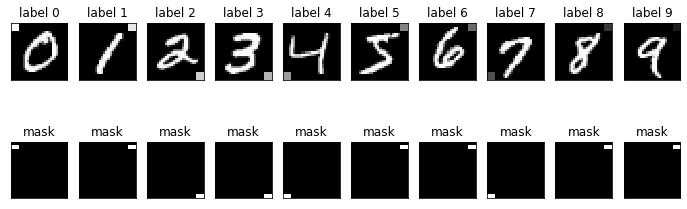

In [5]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(device=DEVICE, batch_size=BATCH_SIZE, feedback='incomplete')
# show image and explanation
print("Incomplete masks...")
util.show_img_expl_grid_mnist(train_dataloader)

[Using Seed= 10]
Loading dataset from existing file!
Adversarial masks...


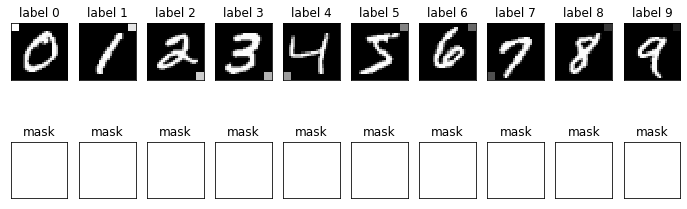

In [6]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(device=DEVICE, batch_size=BATCH_SIZE, feedback='adversarial')
# show image and explanation
print("Adversarial masks...")
util.show_img_expl_grid_mnist(train_dataloader)

## RRR: Feedback Robustness

### Random

[Using Seed= 10]
Loading dataset from existing file!
RRR-Random
Start training...
Epoch 2| accuracy: 38.9%, loss: 0.008522 | Test Error: Acc: 46.7%, Avg loss: 0.008918
Epoch 4| accuracy: 77.9%, loss: 0.006491 | Test Error: Acc: 75.2%, Avg loss: 0.008553
Epoch 6| accuracy: 85.3%, loss: 0.005559 | Test Error: Acc: 80.8%, Avg loss: 0.008330
Epoch 8| accuracy: 87.8%, loss: 0.005019 | Test Error: Acc: 77.9%, Avg loss: 0.008237
Epoch 10| accuracy: 89.0%, loss: 0.004758 | Test Error: Acc: 80.9%, Avg loss: 0.008126
Epoch 12| accuracy: 89.8%, loss: 0.004556 | Test Error: Acc: 82.5%, Avg loss: 0.008055
Epoch 14| accuracy: 90.0%, loss: 0.004405 | Test Error: Acc: 83.3%, Avg loss: 0.007997
Epoch 16| accuracy: 90.0%, loss: 0.004343 | Test Error: Acc: 84.0%, Avg loss: 0.007968
Epoch 18| accuracy: 90.6%, loss: 0.004264 | Test Error: Acc: 85.3%, Avg loss: 0.007925
Epoch 20| accuracy: 91.0%, loss: 0.004182 | Test Error: Acc: 85.3%, Avg loss: 0.007890
Epoch 22| accuracy: 90.8%, loss: 0.004202 | Test Err

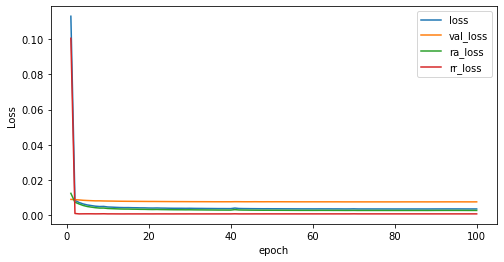

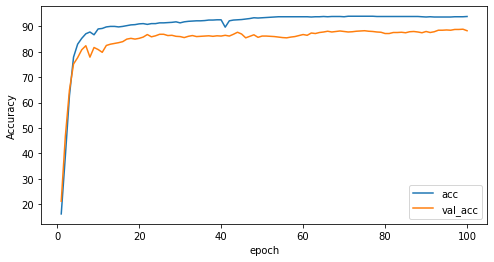

In [3]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(device=DEVICE, batch_size=BATCH_SIZE, feedback='random')
# ########### initalize model, loss and optimizer
model = dnns.SimpleMlp().to(DEVICE)
loss_fn = RRRLoss(10)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ############ Learn routine
print("RRR-Random")
learner = Learner(model, loss_fn, optimizer, DEVICE, 'RQ2A-Random-DecoyMNIST-MLP-RRR--reg=10--seed=10--LR=0*001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
learner.plot_loss_acc()


### Incomplete

[Using Seed= 10]
Loading dataset from existing file!
RRR-Incomplete
Start training...
Epoch 2| accuracy: 94.1%, loss: 0.000841 | Test Error: Acc: 77.2%, Avg loss: 0.006851
Epoch 4| accuracy: 96.9%, loss: 0.000414 | Test Error: Acc: 69.1%, Avg loss: 0.007119
Epoch 6| accuracy: 97.8%, loss: 0.000290 | Test Error: Acc: 64.8%, Avg loss: 0.007262
Epoch 8| accuracy: 98.3%, loss: 0.000224 | Test Error: Acc: 62.2%, Avg loss: 0.007361
Epoch 10| accuracy: 98.5%, loss: 0.000190 | Test Error: Acc: 61.1%, Avg loss: 0.007393
Epoch 12| accuracy: 98.7%, loss: 0.000165 | Test Error: Acc: 61.2%, Avg loss: 0.007391
Epoch 14| accuracy: 98.6%, loss: 0.000166 | Test Error: Acc: 61.1%, Avg loss: 0.007392
Epoch 16| accuracy: 98.9%, loss: 0.000140 | Test Error: Acc: 58.7%, Avg loss: 0.007491
Epoch 18| accuracy: 99.1%, loss: 0.000113 | Test Error: Acc: 57.4%, Avg loss: 0.007530
Epoch 20| accuracy: 99.1%, loss: 0.000111 | Test Error: Acc: 59.5%, Avg loss: 0.007449
Epoch 22| accuracy: 99.2%, loss: 0.000097 | Test

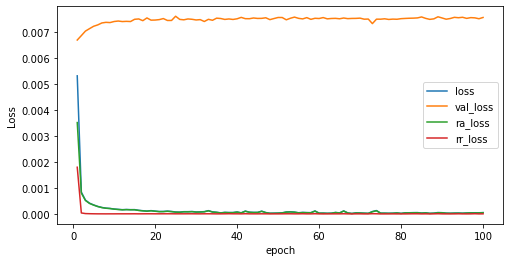

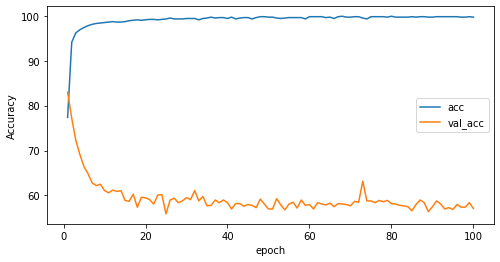

In [4]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(device=DEVICE, batch_size=BATCH_SIZE, feedback='incomplete')
# ########### initalize model, loss and optimizer
model = dnns.SimpleMlp().to(DEVICE)
loss_fn = RRRLoss(10)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ############ Learn routine
print('RRR-Incomplete')
learner = Learner(model, loss_fn, optimizer, DEVICE, 'RQ2A-Incomplete-DecoyMNIST-MLP-RRR--reg=10--seed=10--LR=0*001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
learner.plot_loss_acc()


We expect that the incomplete feedback does not help to overcome confounders as the MLP...??

### Adversarial

[Using Seed= 10]
Loading dataset from existing file!
RRR-Adversarial
Start training...
Epoch 2| accuracy: 23.7%, loss: 0.009720 | Test Error: Acc: 29.8%, Avg loss: 0.009070
Epoch 4| accuracy: 66.4%, loss: 0.007658 | Test Error: Acc: 65.0%, Avg loss: 0.008907
Epoch 6| accuracy: 78.5%, loss: 0.006920 | Test Error: Acc: 71.2%, Avg loss: 0.008787
Epoch 8| accuracy: 82.2%, loss: 0.006509 | Test Error: Acc: 75.7%, Avg loss: 0.008682
Epoch 10| accuracy: 84.9%, loss: 0.006043 | Test Error: Acc: 78.6%, Avg loss: 0.008557
Epoch 12| accuracy: 86.6%, loss: 0.005688 | Test Error: Acc: 80.8%, Avg loss: 0.008448
Epoch 14| accuracy: 86.7%, loss: 0.005575 | Test Error: Acc: 81.3%, Avg loss: 0.008383
Epoch 16| accuracy: 88.1%, loss: 0.005402 | Test Error: Acc: 82.8%, Avg loss: 0.008304
Epoch 18| accuracy: 85.9%, loss: 0.005440 | Test Error: Acc: 83.1%, Avg loss: 0.008277
Epoch 20| accuracy: 88.6%, loss: 0.005015 | Test Error: Acc: 83.2%, Avg loss: 0.008203
Epoch 22| accuracy: 88.7%, loss: 0.004913 | Tes

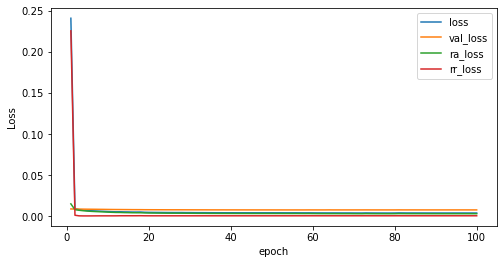

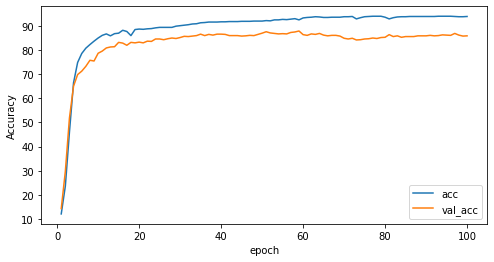

In [5]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(device=DEVICE, batch_size=BATCH_SIZE, feedback='adversarial')
# ########### initalize model, loss and optimizer
model = dnns.SimpleMlp().to(DEVICE)
loss_fn = RRRLoss(10)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ############ Learn routine
print('RRR-Adversarial')
learner = Learner(model, loss_fn, optimizer, DEVICE, 'RQ2A-Adversarial-DecoyMNIST-MLP-RRR--reg=10--seed=10--LR=0*001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
learner.plot_loss_acc()


We expected the adversarial feedback to also help the model overcome the confounders, because the MLP structure .... 

## RBR: Feedback Robustness

### Random 

[Using Seed= 10]
Loading dataset from existing file!
RBR-Random
Start training...
Epoch 2| accuracy: 94.6%, loss: 0.000770 | Test Error: Acc: 74.6%, Avg loss: 0.006946
Epoch 4| accuracy: 97.1%, loss: 0.000403 | Test Error: Acc: 69.7%, Avg loss: 0.007091
Epoch 6| accuracy: 98.0%, loss: 0.000285 | Test Error: Acc: 71.2%, Avg loss: 0.007035
Epoch 8| accuracy: 98.1%, loss: 0.000266 | Test Error: Acc: 71.8%, Avg loss: 0.007010
Epoch 10| accuracy: 98.6%, loss: 0.000196 | Test Error: Acc: 71.0%, Avg loss: 0.007035
Epoch 12| accuracy: 99.0%, loss: 0.000158 | Test Error: Acc: 70.2%, Avg loss: 0.007054
Epoch 14| accuracy: 98.8%, loss: 0.000174 | Test Error: Acc: 71.1%, Avg loss: 0.007016
Epoch 16| accuracy: 99.1%, loss: 0.000124 | Test Error: Acc: 71.2%, Avg loss: 0.007020
Epoch 18| accuracy: 98.9%, loss: 0.000160 | Test Error: Acc: 70.4%, Avg loss: 0.007040
Epoch 20| accuracy: 99.2%, loss: 0.000112 | Test Error: Acc: 70.3%, Avg loss: 0.007046
Epoch 22| accuracy: 99.4%, loss: 0.000087 | Test Err

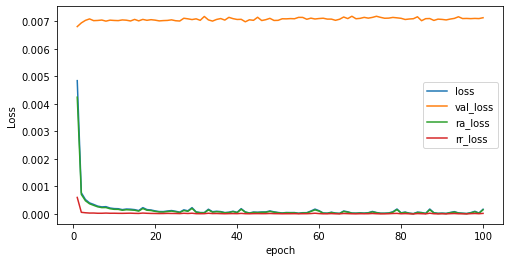

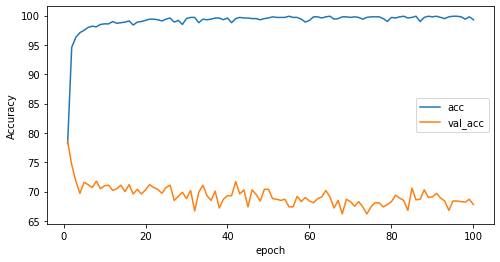

In [3]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(device=DEVICE, batch_size=BATCH_SIZE, feedback='random')
# ########### initalize model, loss and optimizer
model = dnns.SimpleMlp().to(DEVICE)
loss_fn = RBRLoss(1000)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ############ Learn routine
print("RBR-Random")
learner = Learner(model, loss_fn, optimizer, DEVICE, 'RQ2A-Random-DecoyMNIST-MLP-RBR--reg=1k--seed=10--LR=0*001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
learner.plot_loss_acc()


### Incomplete

[Using Seed= 10]
Loading dataset from existing file!
RBR-Incomplete
Start training...
Epoch 2| accuracy: 96.3%, loss: 0.000490 | Test Error: Acc: 68.9%, Avg loss: 0.007129
Epoch 4| accuracy: 97.9%, loss: 0.000268 | Test Error: Acc: 68.6%, Avg loss: 0.007124
Epoch 6| accuracy: 98.4%, loss: 0.000197 | Test Error: Acc: 66.4%, Avg loss: 0.007198
Epoch 8| accuracy: 98.9%, loss: 0.000132 | Test Error: Acc: 64.5%, Avg loss: 0.007262
Epoch 10| accuracy: 99.1%, loss: 0.000112 | Test Error: Acc: 65.1%, Avg loss: 0.007238
Epoch 12| accuracy: 99.0%, loss: 0.000118 | Test Error: Acc: 65.5%, Avg loss: 0.007221
Epoch 14| accuracy: 99.1%, loss: 0.000100 | Test Error: Acc: 63.2%, Avg loss: 0.007311
Epoch 16| accuracy: 99.2%, loss: 0.000098 | Test Error: Acc: 63.8%, Avg loss: 0.007285
Epoch 18| accuracy: 99.4%, loss: 0.000075 | Test Error: Acc: 64.7%, Avg loss: 0.007253
Epoch 20| accuracy: 99.1%, loss: 0.000120 | Test Error: Acc: 63.7%, Avg loss: 0.007285
Epoch 22| accuracy: 99.4%, loss: 0.000079 | Test

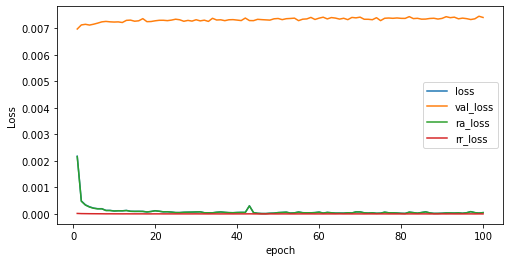

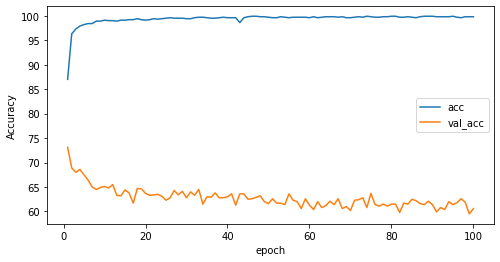

In [4]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(device=DEVICE, batch_size=BATCH_SIZE, feedback='incomplete')
# ########### initalize model, loss and optimizer
model = dnns.SimpleMlp().to(DEVICE)
loss_fn = RBRLoss(1000)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ############ Learn routine
print('RBR-Incomplete')
learner = Learner(model, loss_fn, optimizer, DEVICE, 'RQ2A-Incomplete-DecoyMNIST-MLP-RRR--reg=1k--seed=10--LR=0*001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
learner.plot_loss_acc()


### Adversarial

[Using Seed= 10]
Loading dataset from existing file!
RBR-Adversarial
Start training...
Epoch 2| accuracy: 93.3%, loss: 0.001042 | Test Error: Acc: 79.3%, Avg loss: 0.006760
Epoch 4| accuracy: 96.5%, loss: 0.000499 | Test Error: Acc: 75.2%, Avg loss: 0.006894
Epoch 6| accuracy: 97.5%, loss: 0.000356 | Test Error: Acc: 73.8%, Avg loss: 0.006951
Epoch 8| accuracy: 98.0%, loss: 0.000283 | Test Error: Acc: 72.9%, Avg loss: 0.006976
Epoch 10| accuracy: 98.4%, loss: 0.000239 | Test Error: Acc: 72.8%, Avg loss: 0.006968
Epoch 12| accuracy: 98.6%, loss: 0.000207 | Test Error: Acc: 72.8%, Avg loss: 0.006965
Epoch 14| accuracy: 98.7%, loss: 0.000207 | Test Error: Acc: 73.4%, Avg loss: 0.006942
Epoch 16| accuracy: 99.0%, loss: 0.000159 | Test Error: Acc: 71.8%, Avg loss: 0.006997
Epoch 18| accuracy: 98.9%, loss: 0.000161 | Test Error: Acc: 72.9%, Avg loss: 0.006949
Epoch 20| accuracy: 99.1%, loss: 0.000135 | Test Error: Acc: 72.2%, Avg loss: 0.006977
Epoch 22| accuracy: 98.6%, loss: 0.000190 | Tes

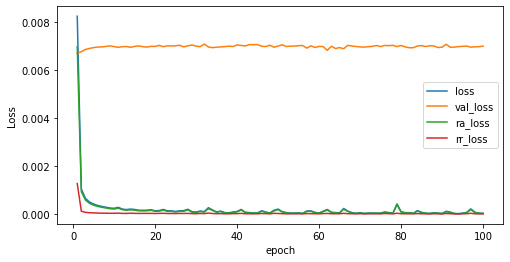

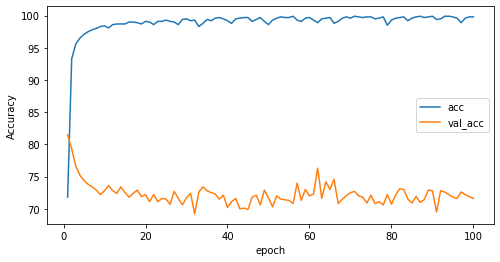

In [5]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(device=DEVICE, batch_size=BATCH_SIZE, feedback='adversarial')
# ########### initalize model, loss and optimizer
model = dnns.SimpleMlp().to(DEVICE)
loss_fn = RBRLoss(1000)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ############ Learn routine
print('RBR-Adversarial')
learner = Learner(model, loss_fn, optimizer, DEVICE, 'RQ2A-Adversarial-DecoyMNIST-MLP-RBR--reg=1k--seed=10--LR=0*001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
learner.plot_loss_acc()


## CDEP Feedback Robustness

### Random

[Using Seed= 10]
Loading dataset from existing file!
CDEP-Random
Start training...
Epoch 2| accuracy: 76.7%, loss: 0.003924 | Test Error: Acc: 72.5%, Avg loss: 0.007266
Epoch 4| accuracy: 72.1%, loss: 0.010836 | Test Error: Acc: 65.6%, Avg loss: 0.007453
Epoch 6| accuracy: 84.4%, loss: 0.006462 | Test Error: Acc: 69.8%, Avg loss: 0.007222
Epoch 8| accuracy: 88.3%, loss: 0.003365 | Test Error: Acc: 72.4%, Avg loss: 0.007139
Epoch 10| accuracy: 88.1%, loss: 0.004669 | Test Error: Acc: 66.7%, Avg loss: 0.007299
Epoch 12| accuracy: 90.3%, loss: 0.003521 | Test Error: Acc: 64.1%, Avg loss: 0.007378
Epoch 14| accuracy: 91.4%, loss: 0.004506 | Test Error: Acc: 60.2%, Avg loss: 0.007505
Epoch 16| accuracy: 90.0%, loss: 0.005425 | Test Error: Acc: 58.3%, Avg loss: 0.007566
Epoch 18| accuracy: 92.1%, loss: 0.002916 | Test Error: Acc: 56.5%, Avg loss: 0.007621
Epoch 20| accuracy: 91.2%, loss: 0.005080 | Test Error: Acc: 57.5%, Avg loss: 0.007583
Epoch 22| accuracy: 92.0%, loss: 0.003564 | Test Er

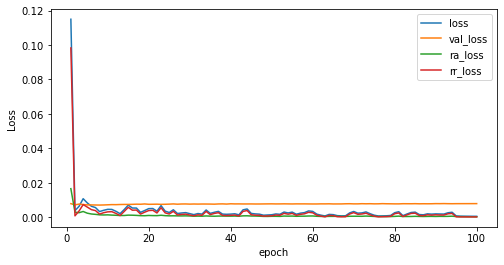

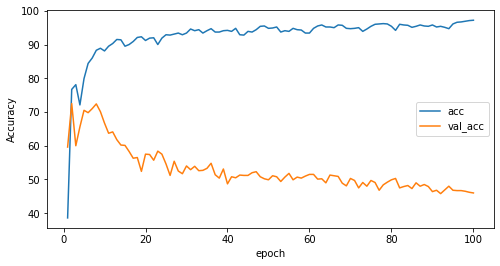

In [6]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(device=DEVICE, batch_size=BATCH_SIZE, feedback='random')
# ########### initalize model, loss and optimizer
model = dnns.SimpleMlp().to(DEVICE)
loss_fn = CDEPLoss(1000)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ############ Learn routine
print("CDEP-Random")
learner = Learner(model, loss_fn, optimizer, DEVICE, 'RQ2A-Random-DecoyMNIST-MLP-CDEP--reg=1k--seed=10--LR=0*001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
learner.plot_loss_acc()


### Incomplete

[Using Seed= 10]
Loading dataset from existing file!
CDEP-Incomplete
Start training...
Epoch 2| accuracy: 89.2%, loss: 0.001452 | Test Error: Acc: 76.9%, Avg loss: 0.006878
Epoch 4| accuracy: 94.1%, loss: 0.000769 | Test Error: Acc: 72.7%, Avg loss: 0.006998
Epoch 6| accuracy: 95.7%, loss: 0.000559 | Test Error: Acc: 70.2%, Avg loss: 0.007087
Epoch 8| accuracy: 96.6%, loss: 0.000434 | Test Error: Acc: 68.3%, Avg loss: 0.007147
Epoch 10| accuracy: 97.3%, loss: 0.000349 | Test Error: Acc: 66.9%, Avg loss: 0.007192
Epoch 12| accuracy: 97.7%, loss: 0.000293 | Test Error: Acc: 66.4%, Avg loss: 0.007211
Epoch 14| accuracy: 98.0%, loss: 0.000254 | Test Error: Acc: 64.8%, Avg loss: 0.007263
Epoch 16| accuracy: 98.2%, loss: 0.000228 | Test Error: Acc: 65.4%, Avg loss: 0.007236
Epoch 18| accuracy: 98.2%, loss: 0.000218 | Test Error: Acc: 62.0%, Avg loss: 0.007358
Epoch 20| accuracy: 98.4%, loss: 0.000197 | Test Error: Acc: 62.4%, Avg loss: 0.007338
Epoch 22| accuracy: 98.1%, loss: 0.000244 | Tes

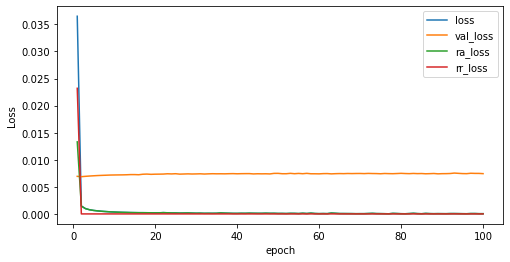

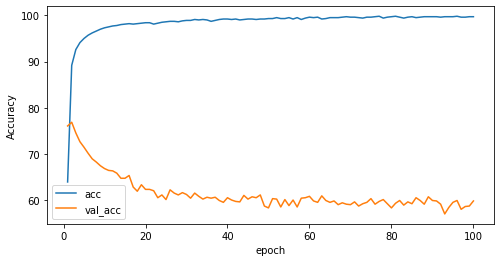

In [3]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(device=DEVICE, batch_size=BATCH_SIZE, feedback='incomplete')
# ########### initalize model, loss and optimizer
model = dnns.SimpleMlp().to(DEVICE)
loss_fn = CDEPLoss(1000)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ############ Learn routine
print('CDEP-Incomplete')
learner = Learner(model, loss_fn, optimizer, DEVICE, 'RQ2A-Incomplete-DecoyMNIST-MLP-CDEP--reg=1k--seed=10--LR=0*001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
learner.plot_loss_acc()


### Adversarial

[Using Seed= 10]
Loading dataset from existing file!
RBR-Adversarial
Start training...
Epoch 2| accuracy: 89.9%, loss: 0.001469 | Test Error: Acc: 76.9%, Avg loss: 0.006847
Epoch 4| accuracy: 94.9%, loss: 0.000693 | Test Error: Acc: 72.2%, Avg loss: 0.007009
Epoch 6| accuracy: 96.4%, loss: 0.000477 | Test Error: Acc: 68.8%, Avg loss: 0.007119
Epoch 8| accuracy: 97.1%, loss: 0.000381 | Test Error: Acc: 66.8%, Avg loss: 0.007184
Epoch 10| accuracy: 97.5%, loss: 0.000321 | Test Error: Acc: 65.8%, Avg loss: 0.007225
Epoch 12| accuracy: 98.0%, loss: 0.000270 | Test Error: Acc: 65.3%, Avg loss: 0.007257
Epoch 14| accuracy: 98.2%, loss: 0.000245 | Test Error: Acc: 64.2%, Avg loss: 0.007285
Epoch 16| accuracy: 98.2%, loss: 0.000235 | Test Error: Acc: 63.3%, Avg loss: 0.007318
Epoch 18| accuracy: 97.9%, loss: 0.000262 | Test Error: Acc: 64.6%, Avg loss: 0.007261
Epoch 20| accuracy: 98.3%, loss: 0.000218 | Test Error: Acc: 62.1%, Avg loss: 0.007360
Epoch 22| accuracy: 98.2%, loss: 0.000242 | Tes

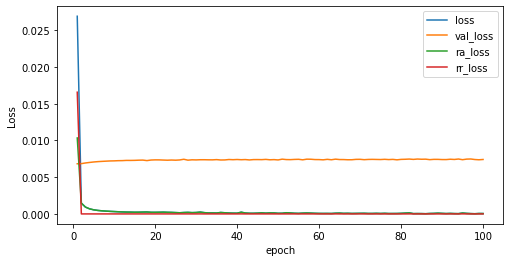

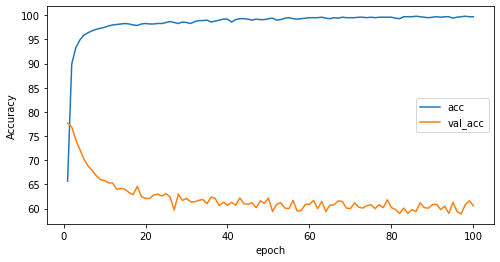

In [8]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(device=DEVICE, batch_size=BATCH_SIZE, feedback='adversarial')
# ########### initalize model, loss and optimizer
model = dnns.SimpleMlp().to(DEVICE)
loss_fn = CDEPLoss(1000)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ############ Learn routine
print('RBR-Adversarial')
learner = Learner(model, loss_fn, optimizer, DEVICE, 'RQ2A-Adversarial-DecoyMNIST-MLP-CDEP--reg=1k--seed=10--LR=0*001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
learner.plot_loss_acc()


## CE Feedback Robustness  
CE is an augmentation strategy which adds counterexamples. These counterexamples are generated based on the feedback mask (given by the user - we simulate these). The feedback masks for the different cases can be seen at the beginning of this notebook. As we are using the ce_strategy 'random' (randomize pixels which are masked by the feedback) we get the the following counterexamples...(examples shown below)

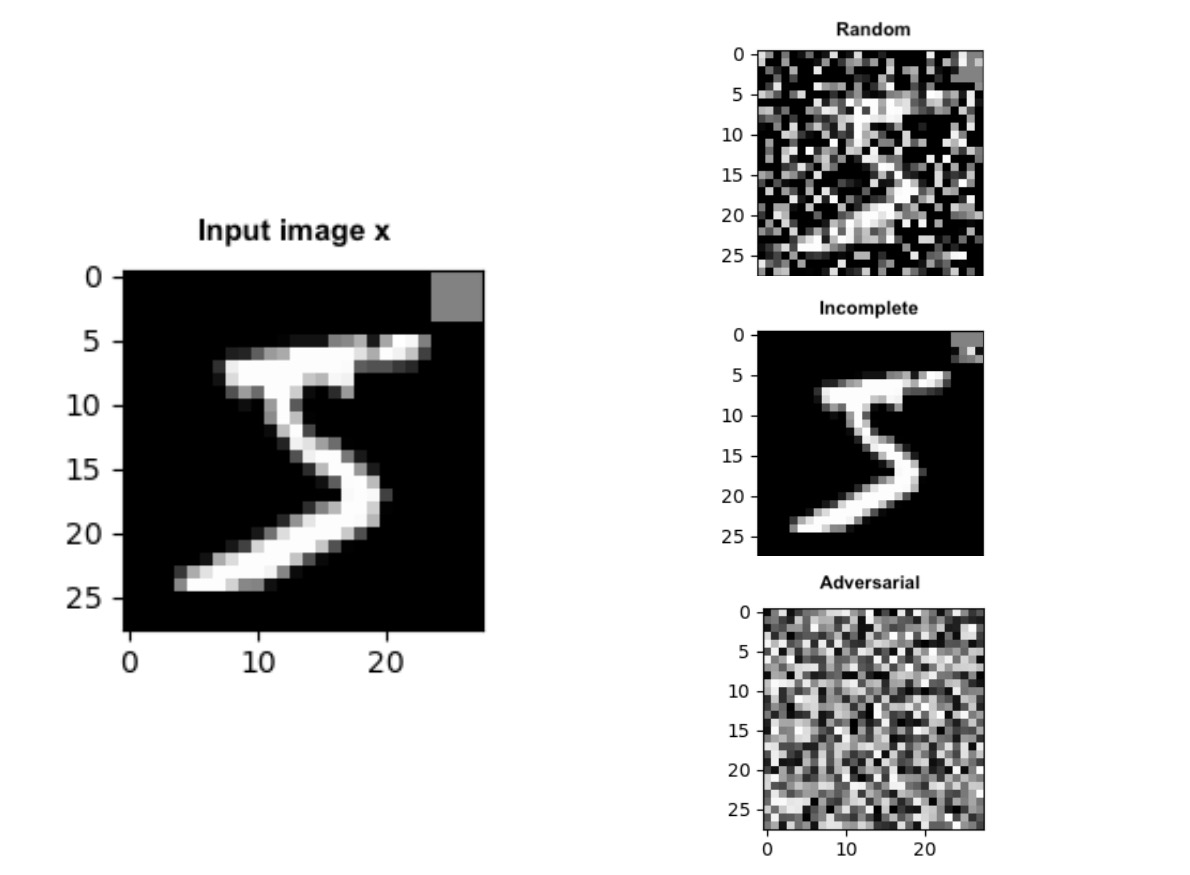

In [7]:
from IPython import display
display.Image("nb_images/CE-FeedbackRobustness-DecoyMNIST-examples.jpg")

### Random

[Using Seed= 10]
Loading dataset from existing file!
Train set was augmented: X.size= 120000, y.size= 120000
CE-Random
Start training...
Epoch 2| accuracy: 85.3%, loss: 0.001809 | Test Error: Acc: 81.4%, Avg loss: 0.006622
Epoch 4| accuracy: 89.1%, loss: 0.001316 | Test Error: Acc: 77.2%, Avg loss: 0.006787
Epoch 6| accuracy: 90.2%, loss: 0.001175 | Test Error: Acc: 78.0%, Avg loss: 0.006749
Epoch 8| accuracy: 90.5%, loss: 0.001135 | Test Error: Acc: 79.7%, Avg loss: 0.006686
Epoch 10| accuracy: 91.1%, loss: 0.001073 | Test Error: Acc: 73.4%, Avg loss: 0.006924
Epoch 12| accuracy: 91.6%, loss: 0.001008 | Test Error: Acc: 73.3%, Avg loss: 0.006931
Epoch 14| accuracy: 91.8%, loss: 0.000974 | Test Error: Acc: 74.6%, Avg loss: 0.006872
Epoch 16| accuracy: 92.0%, loss: 0.000953 | Test Error: Acc: 72.3%, Avg loss: 0.006961
Epoch 18| accuracy: 92.3%, loss: 0.000925 | Test Error: Acc: 74.0%, Avg loss: 0.006902
Epoch 20| accuracy: 92.5%, loss: 0.000898 | Test Error: Acc: 70.7%, Avg loss: 0.0070

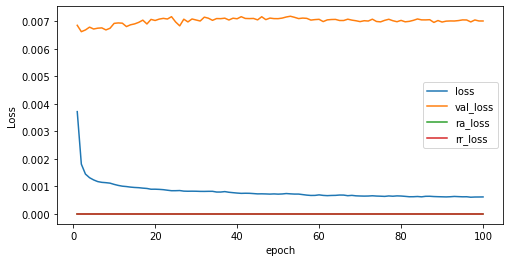

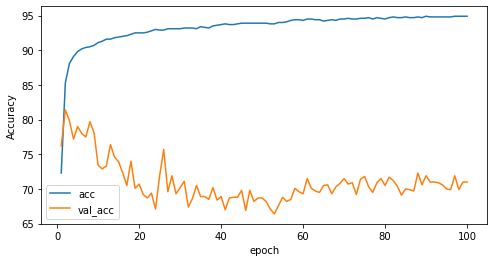

In [4]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist_CE_augmented(device=DEVICE, batch_size=BATCH_SIZE, feedback='random')
# ########### initalize model, loss and optimizer
model = dnns.SimpleMlp().to(DEVICE)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ############ Learn routine
print("CE-Random")
learner = Learner(model, loss_fn, optimizer, DEVICE, 'RQ2A-Random-DecoyMNIST-MLP-CE--reg=60k--seed=10--LR=0*001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
learner.plot_loss_acc()


### Incomplete

[Using Seed= 10]
Loading dataset from existing file!
Train set was augmented: X.size= 120000, y.size= 120000
CE-Incomplete
Start training...
Epoch 2| accuracy: 97.4%, loss: 0.000316 | Test Error: Acc: 67.5%, Avg loss: 0.007165
Epoch 4| accuracy: 98.7%, loss: 0.000152 | Test Error: Acc: 65.4%, Avg loss: 0.007230
Epoch 6| accuracy: 98.8%, loss: 0.000132 | Test Error: Acc: 62.0%, Avg loss: 0.007351
Epoch 8| accuracy: 99.1%, loss: 0.000114 | Test Error: Acc: 61.4%, Avg loss: 0.007374
Epoch 10| accuracy: 99.3%, loss: 0.000079 | Test Error: Acc: 60.4%, Avg loss: 0.007414
Epoch 12| accuracy: 99.4%, loss: 0.000077 | Test Error: Acc: 60.1%, Avg loss: 0.007425
Epoch 14| accuracy: 99.2%, loss: 0.000111 | Test Error: Acc: 59.9%, Avg loss: 0.007433
Epoch 16| accuracy: 99.5%, loss: 0.000066 | Test Error: Acc: 60.6%, Avg loss: 0.007412
Epoch 18| accuracy: 99.5%, loss: 0.000056 | Test Error: Acc: 59.6%, Avg loss: 0.007446
Epoch 20| accuracy: 99.5%, loss: 0.000077 | Test Error: Acc: 58.4%, Avg loss: 0.

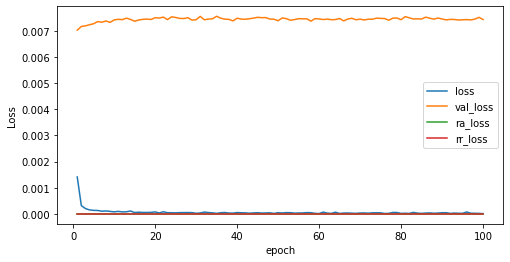

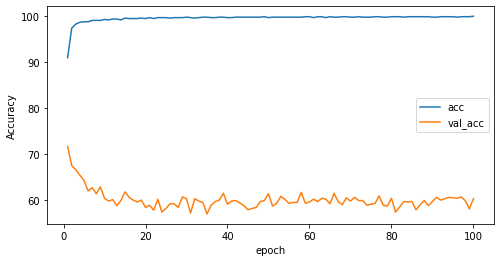

In [5]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist_CE_augmented(device=DEVICE, batch_size=BATCH_SIZE, feedback='incomplete')
# ########### initalize model, loss and optimizer
model = dnns.SimpleMlp().to(DEVICE)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ############ Learn routine
print("CE-Incomplete")
learner = Learner(model, loss_fn, optimizer, DEVICE, 'RQ2A-Incomplete-DecoyMNIST-MLP-CE--reg=60k--seed=10--LR=0*001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
learner.plot_loss_acc()


### Adversarial

[Using Seed= 10]
Loading dataset from existing file!
Train set was augmented: X.size= 120000, y.size= 120000
CE-Adversarial
Start training...
Epoch 2| accuracy: 50.7%, loss: 0.005166 | Test Error: Acc: 63.3%, Avg loss: 0.007331
Epoch 4| accuracy: 54.1%, loss: 0.004695 | Test Error: Acc: 69.7%, Avg loss: 0.007073
Epoch 6| accuracy: 54.5%, loss: 0.004645 | Test Error: Acc: 67.8%, Avg loss: 0.007153
Epoch 8| accuracy: 54.6%, loss: 0.004625 | Test Error: Acc: 61.8%, Avg loss: 0.007381
Epoch 10| accuracy: 54.7%, loss: 0.004610 | Test Error: Acc: 64.5%, Avg loss: 0.007272
Epoch 12| accuracy: 54.8%, loss: 0.004603 | Test Error: Acc: 64.3%, Avg loss: 0.007276
Epoch 14| accuracy: 54.9%, loss: 0.004586 | Test Error: Acc: 65.2%, Avg loss: 0.007245
Epoch 16| accuracy: 55.1%, loss: 0.004571 | Test Error: Acc: 61.7%, Avg loss: 0.007379
Epoch 18| accuracy: 55.0%, loss: 0.004570 | Test Error: Acc: 63.4%, Avg loss: 0.007307
Epoch 20| accuracy: 55.0%, loss: 0.004575 | Test Error: Acc: 62.8%, Avg loss: 0

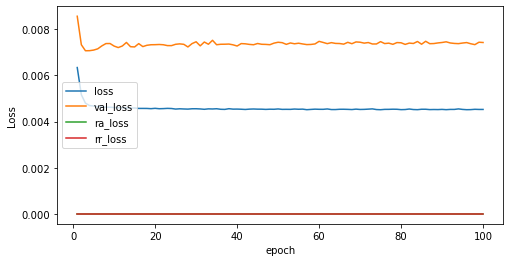

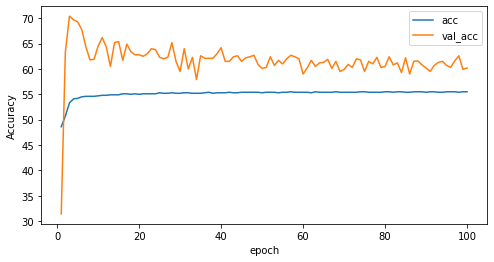

In [6]:
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist_CE_augmented(device=DEVICE, batch_size=BATCH_SIZE, feedback='adversarial')
# ########### initalize model, loss and optimizer
model = dnns.SimpleMlp().to(DEVICE)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ############ Learn routine
print("CE-Adversarial")
learner = Learner(model, loss_fn, optimizer, DEVICE, 'RQ2A-Adversarial-DecoyMNIST-MLP-CE--reg=60k--seed=10--LR=0*001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)
learner.plot_loss_acc()
